## Madhira Durga Dattatreya Sarma
Data Science and Business Analytics Intern

The Sparks Foundation                                                

# TASK 1: Prediction Using Unsupervised Learning Machine Learning

### Problem Statement

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

### Approach

Predicting-Iris-Flower-Species-With-K-Means-Clustering

### What is K-Mean Clustering?

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

## Step 1: Importing the required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Preparation 

### Data Loading

In [2]:
# read the dataset
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Inspection

In [3]:
# basics of the iris data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Cleaning

In [6]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No NULL values are observed.

In [7]:
#Checking if any columns having unique value ie only 1 value
unique =iris_data.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

No unique value

In [8]:
iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
#dropping the id column as it is not required
iris_data.drop('Id', axis =1, inplace = True)

In [10]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: EDA

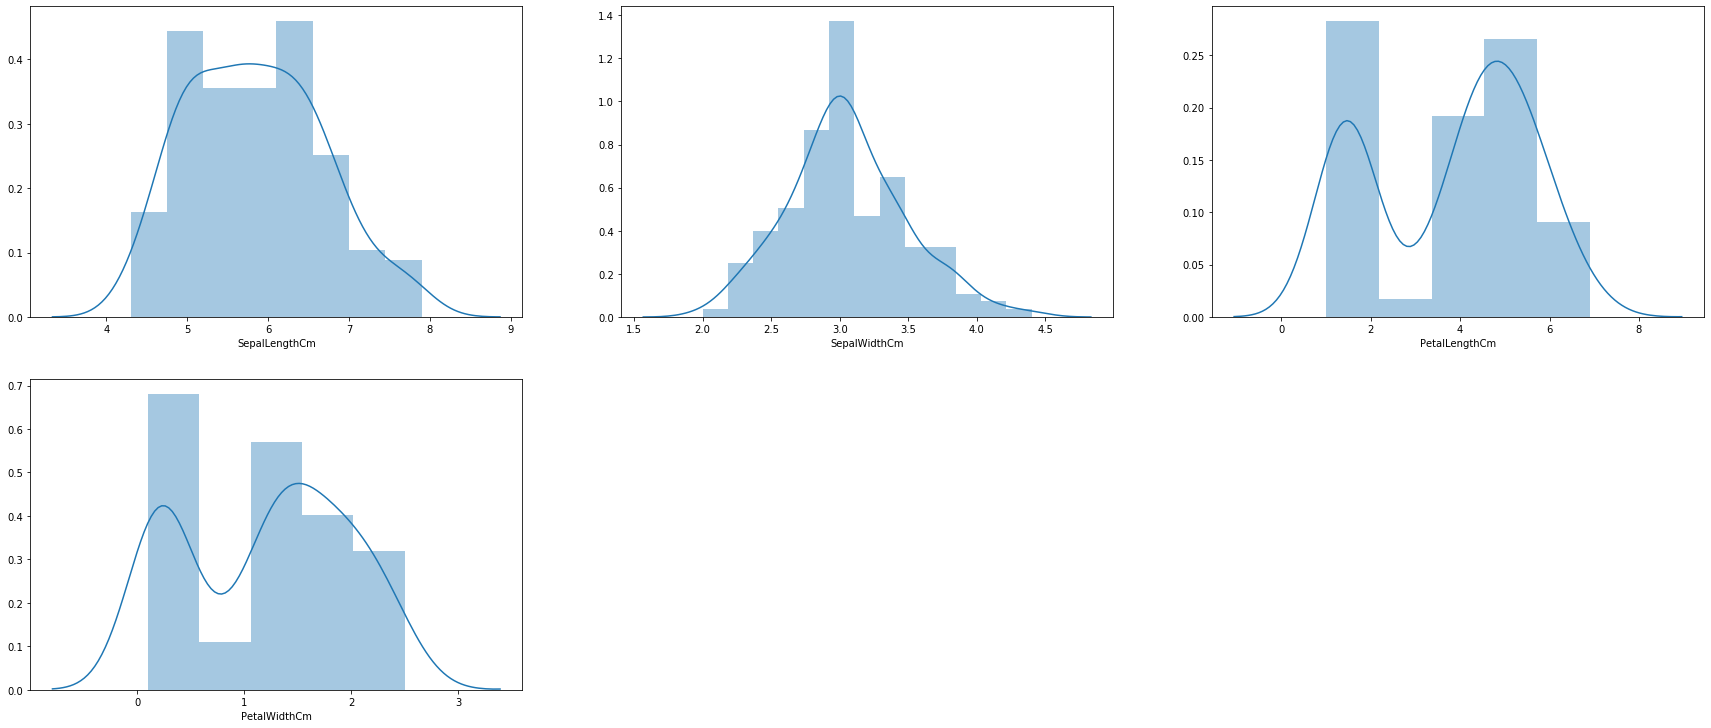

In [11]:
plt.figure(figsize = (30,40))
feature = iris_data.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(iris_data[i[1]])

1. SepalLengthCm, SepalWidthCm are Normal Distributed
2. PetalLengthCm, PetalWidthCm are not Normal Distributed

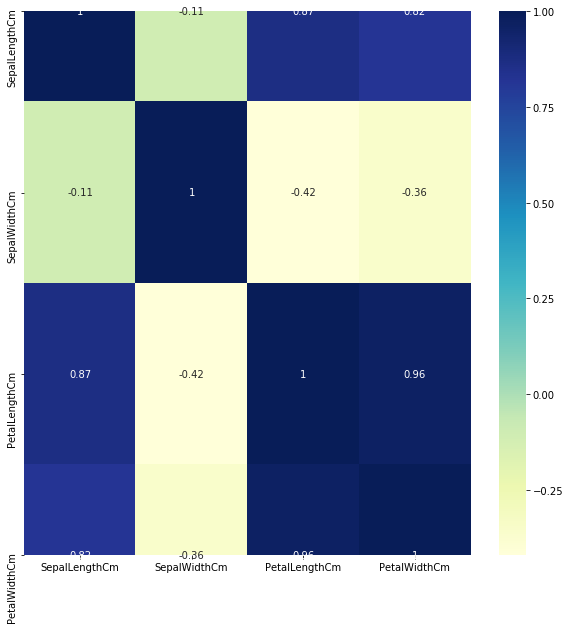

In [12]:
# Heatmap to understand the attributes dependency

# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (10,10))  
sns.heatmap(iris_data.corr(),annot = True,cmap="YlGnBu")

From the above heatmap we can say Petal Length and Petal Width are highly correlated

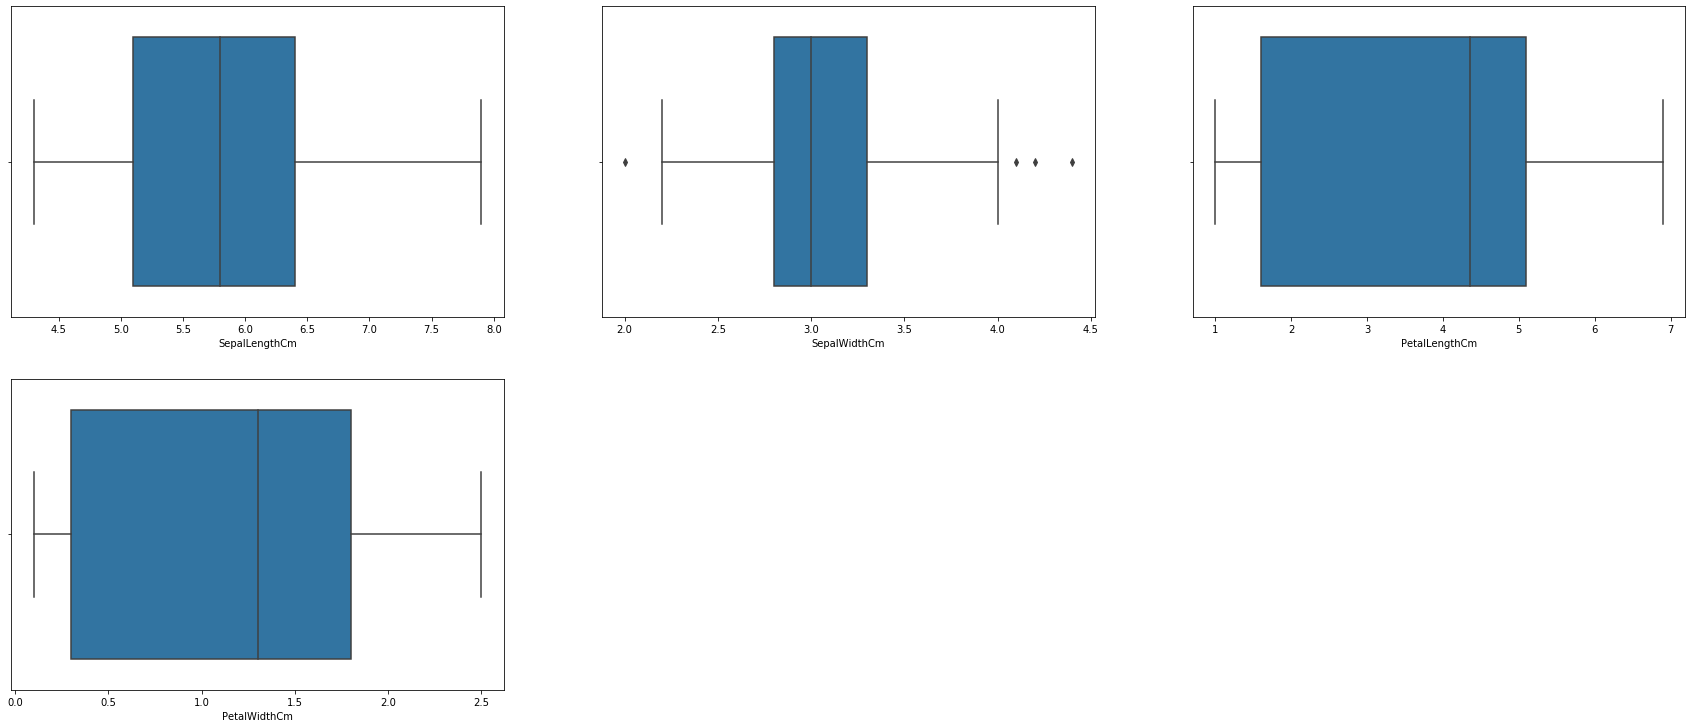

In [13]:
plt.figure(figsize = (30,40))
feature = iris_data.columns[:-1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.boxplot(iris_data[i[1]])

From the above boxplot we can say that there are outliers in the column 'SepalWidthCm'

In [14]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_data['SepalWidthCm'].quantile(0.25)
q3 = iris_data['SepalWidthCm'].quantile(0.75)

In [15]:
# To find out the number of rows and column after outlier treatment
iqr = q3 - q1
iris_data = iris_data[(iris_data['SepalWidthCm'] >= q1-1.5*iqr) & (iris_data['SepalWidthCm'] <= q3+1.5*iqr)]
iris_data.shape # To find out the number of rows and column after outlier treatment

(146, 5)

We can see that after outlier treatment the number of roes are reduced to 147 from 150

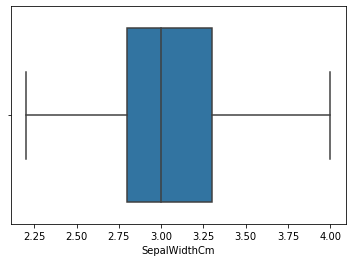

In [16]:
# Bloxplot for sepal width (cm) after outlier treatment
sns.boxplot(x=iris_data['SepalWidthCm'])
plt.show()

## Step 4: Clustering

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris = scaler.fit_transform(iris_data.drop('Species', axis = 1))
iris

array([[-0.9105154 ,  1.1757891 , -1.3748782 , -1.34589856],
       [-1.15112218, -0.09392398, -1.3748782 , -1.34589856],
       [-1.39172896,  0.41396125, -1.43198551, -1.34589856],
       [-1.51203236,  0.16001863, -1.31777088, -1.34589856],
       [-1.03081879,  1.42973171, -1.3748782 , -1.34589856],
       [-0.54960522,  2.19155956, -1.20355625, -1.08196143],
       [-1.51203236,  0.92184648, -1.3748782 , -1.21392999],
       [-1.03081879,  0.92184648, -1.31777088, -1.34589856],
       [-1.75263914, -0.3478666 , -1.3748782 , -1.34589856],
       [-1.15112218,  0.16001863, -1.31777088, -1.47786712],
       [-0.54960522,  1.68367433, -1.31777088, -1.34589856],
       [-1.27142557,  0.92184648, -1.26066356, -1.34589856],
       [-1.27142557, -0.09392398, -1.3748782 , -1.47786712],
       [-1.87294253, -0.09392398, -1.54620014, -1.47786712],
       [-0.06839165,  2.44550218, -1.48909283, -1.34589856],
       [-0.54960522,  2.19155956, -1.43198551, -1.08196143],
       [-0.9105154 ,  1.

In [18]:
iris = pd.DataFrame(iris, columns = iris_data.columns[:-1])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


### K-Mean Clustering

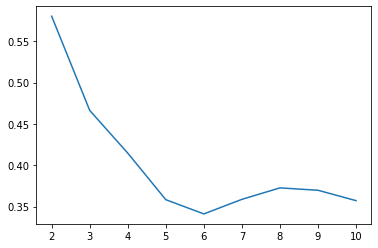

In [19]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(iris)
    ss.append([k, silhouette_score(iris, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

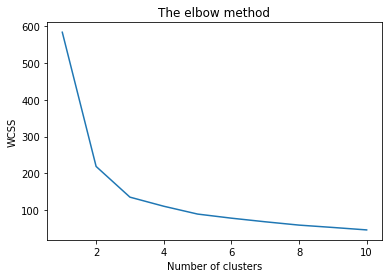

In [20]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [21]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

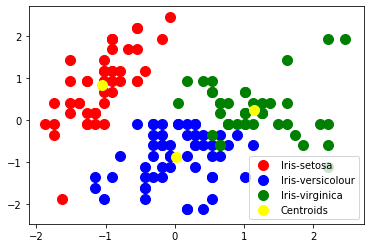

In [22]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Conclusion
It can be observed that 'Petal' dimensions are better features to create cluster than 'Sepal' dimensions. After performing k-means clustering we got 3 as the optimal number of clusters
